## Read in Data

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from KNNClassifier import KNNClassifier

# read in the data - classic Iris dataset
df = pd.read_csv('C:/Users/spenc/Documents/Data Annotation/Project Codex/Data/iris.csv',  header = None)

df.columns = ['x1', 'x2', 'x3', 'x4', 'category']
print(df.head())
print(df.info())

    x1   x2   x3   x4     category
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x1        150 non-null    float64
 1   x2        150 non-null    float64
 2   x3        150 non-null    float64
 3   x4        150 non-null    float64
 4   category  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


## Preprocess Data

In [9]:
np.random.seed(33) # for reproducibility

# train/test split, stratified by flower category
train, test = train_test_split(df, test_size = 0.2, stratify = df['category'])

# split datasets by input/output
X_train = train.iloc[:, 0:4]
y_train = train.iloc[:, -1]

X_test = test.iloc[:, 0:4]
y_test = test.iloc[:, -1]

# label encoding
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)

y_test_encoded = label_encoder.fit_transform(y_test)

# Center and scale data
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Fitting

In [10]:
from sklearn import metrics

# initialize the model object with k=5
knn_classifier = KNNClassifier(k = 2)

# train model 
knn_classifier.fit(X_train_scaled, y_train_encoded)

yhat_train_encoded = knn_classifier.predict(X_train_scaled)
yhat_test_encoded = knn_classifier.predict(X_test_scaled)

In [11]:
# In sample
y_true = y_train_encoded
y_pred = yhat_train_encoded

metrics.confusion_matrix(y_true, y_pred)

array([[39,  1,  0],
       [ 0, 38,  2],
       [ 0,  3, 37]], dtype=int64)

In [12]:
# Out of sample
y_true = y_test_encoded
y_pred = yhat_test_encoded

metrics.confusion_matrix(y_true, y_pred)

array([[10,  0,  0],
       [ 0,  8,  2],
       [ 0,  1,  9]], dtype=int64)

## Model Performance Assessment

In [13]:
import seaborn as sb

k_values = range(1, 31)
in_sample_acc = []
out_sample_acc = []
for val in k_values:
    # initialize the model object with k=val
    knn_classifier = KNNClassifier(k = val)
    # train model 
    knn_classifier.fit(X_train_scaled, y_train_encoded)
    yhat_train_encoded = knn_classifier.predict(X_train_scaled)
    yhat_test_encoded = knn_classifier.predict(X_test_scaled)

    # in sample accuracy
    y_true = y_train_encoded
    y_pred = yhat_train_encoded

    conf_mat = metrics.confusion_matrix(y_true, y_pred)
    in_sample_acc.append(np.trace(conf_mat) / len(y_train))

    # out of sample accuracy
    y_true = y_test_encoded
    y_pred = yhat_test_encoded

    conf_mat = metrics.confusion_matrix(y_true, y_pred)
    out_sample_acc.append(np.trace(conf_mat) / len(y_test))

c:\Users\spenc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\spenc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


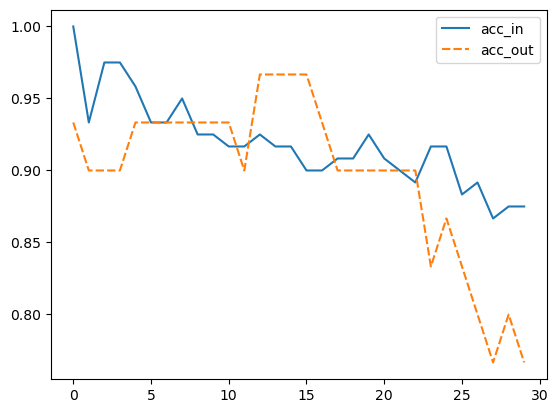

In [14]:
# save evaluation data as a dictionary
eval_data = {
    "k": k_values,
    "acc_in": in_sample_acc,
    "acc_out": out_sample_acc,
}

# convert dictionary to DataFrame
eval_df = pd.DataFrame(eval_data)

# line charts 
perf_plot = sb.lineplot(eval_df.iloc[:, 1:3])

## Conclusion

The `KNNClassifier` appears to be functioning as intended. In the particular case of these Iris data, the parameter `k` should be set to somewhere between 11 and 15.